In [1]:
!pip install hvplot

In [134]:
# Import all the libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

# Data preparation and cleaning

In [4]:
df = pd.read_csv('Real estate.csv')

In [5]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df = df.drop('No', axis = 1)

In [8]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [10]:
df['Year'] = df['X1 transaction date'].astype(int)
df = df.drop('X1 transaction date', axis = 1)

In [11]:
df.head(15)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012
5,7.1,2175.03000,3,24.96305,121.51254,32.1,2012
6,34.5,623.47310,7,24.97933,121.53642,40.3,2012
7,20.3,287.60250,6,24.98042,121.54228,46.7,2013
8,31.7,5512.03800,1,24.95095,121.48458,18.8,2013
9,17.9,1783.18000,3,24.96731,121.51486,22.1,2013


# EDA(Explortatory data analysis)

In [13]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


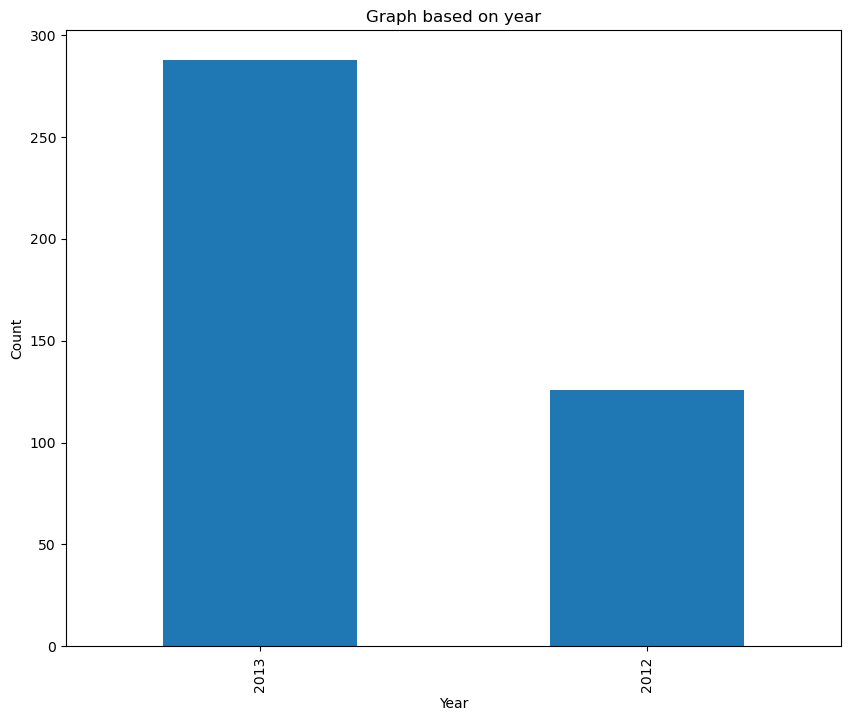

In [14]:
plt.figure(figsize = (10,8))
df['Year'].value_counts().plot(kind = 'bar' )
plt.title('Graph based on year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Pie Chart of houses based on year')

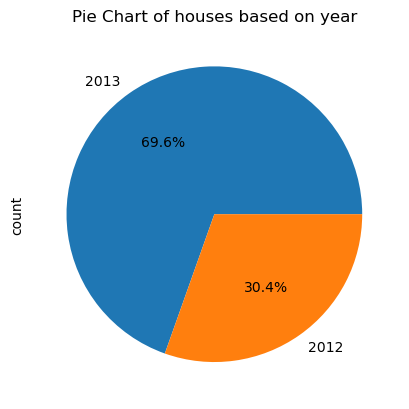

In [15]:
df['Year'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of houses based on year')

In [16]:
df['Year'].value_counts()

Year
2013    288
2012    126
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar Chart of the average house age based on year')

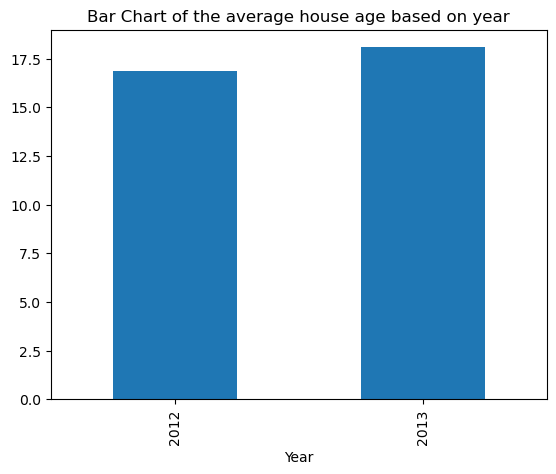

In [17]:
df.groupby(df['Year'])['X2 house age'].mean().plot(kind = 'bar')
plt.title('Bar Chart of the average house age based on year')

In [18]:
df.groupby(df['Year'])['X2 house age'].mean()

Year
2012    16.866667
2013    18.082639
Name: X2 house age, dtype: float64

In [19]:
df['X2 house age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: X2 house age, dtype: float64

Text(0.5, 1.0, 'Box plot of house age with the year ')

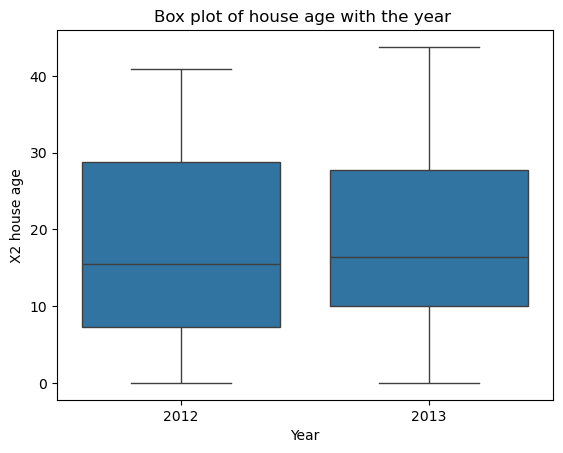

In [20]:
sns.boxplot(x = 'Year', y ='X2 house age', data= df )
plt.title('Box plot of house age with the year ')

Text(0.5, 1.0, 'Box plot of Price per unit area with the year')

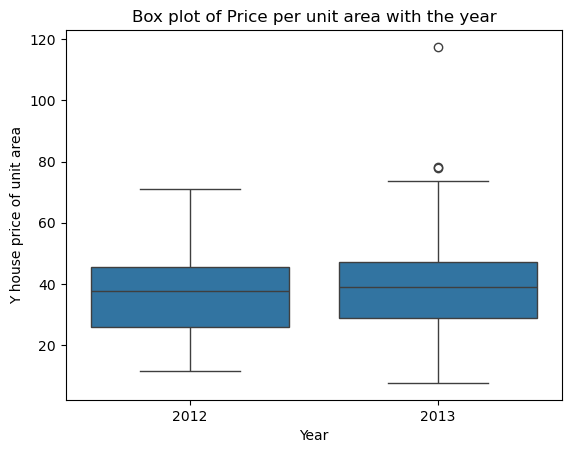

In [21]:
sns.boxplot(x = 'Year', y ='Y house price of unit area', data= df )
plt.title('Box plot of Price per unit area with the year')

In [55]:
import folium

lat_centre = df['X5 latitude'].mean()
long_centre = df['X6 longitude'].mean()
map = folium.Map(location = [lat_centre , long_centre], zoom_start = 12)

for x, row in df.iterrows():
    folium .Marker(
        location = [row['X5 latitude'], row['X6 longitude']],
        popup = f'Price per unit area :{row['Y house price of unit area']}',
        ).add_to(map_)
map_  

In [61]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


In [57]:
df_new = df.drop(columns = ['X5 latitude', 'X6 longitude', 'Year'])

In [59]:
df_new.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [64]:
df_new.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,-0.210567,-0.673613,0.571005,1.000000


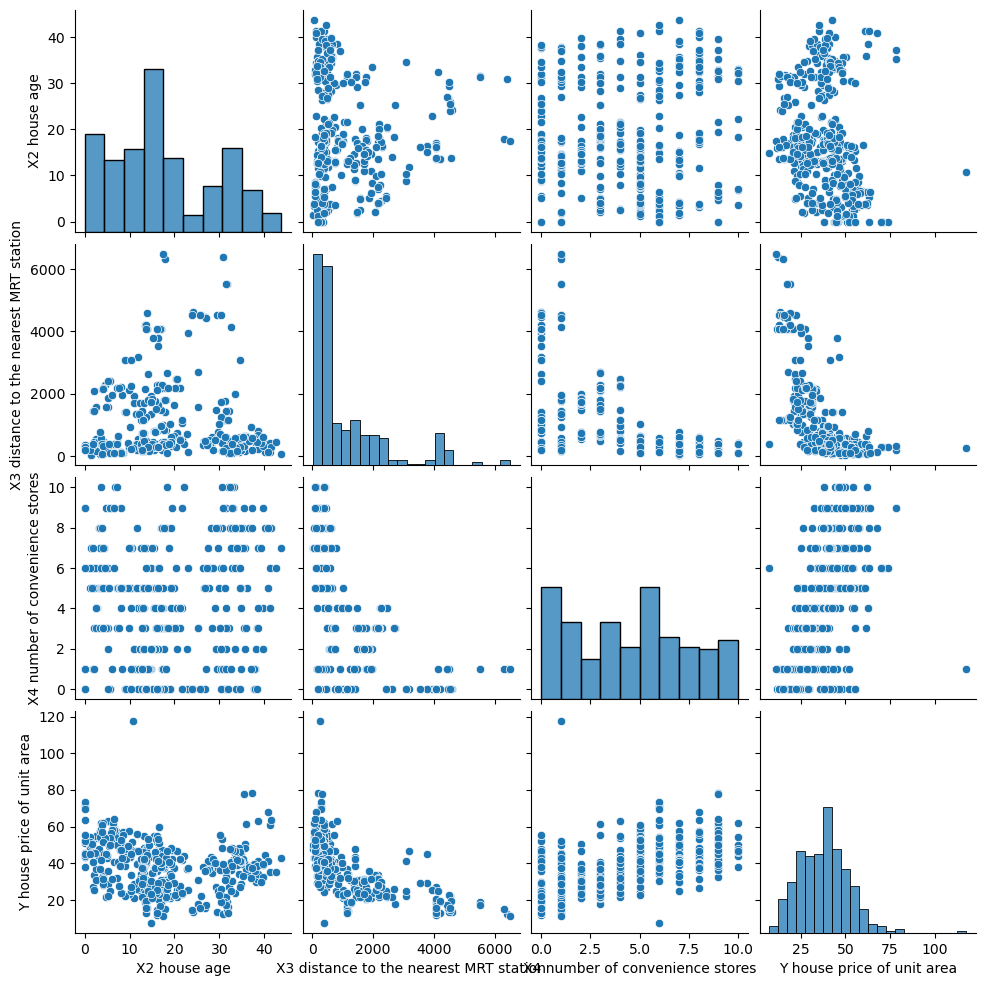

In [68]:
sns.pairplot(df_new)

# Machine learning model

In [88]:
x = df_new.drop('Y house price of unit area',axis = 1)
y = df_new['Y house price of unit area']

In [90]:
print('x=', x.shape, '\ny =', y.shape)

x= (414, 3) 
y = (414,)


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=101)

In [94]:
x_train.shape

(331, 3)

In [96]:
x_test.shape

(83, 3)

## Linear Regression

In [99]:
model = LinearRegression()

In [101]:
model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [104]:
model.coef_

array([-0.27137392, -0.0055877 ,  1.41767531])

In [106]:
pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])

,Coefficients
X2 house age,-0.271374
X3 distance to the nearest MRT station,-0.005588
X4 number of convenience stores,1.417675


## Predictions from our model

In [109]:
y_pred = model.predict(x_test)

In [111]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [113]:
MAE

5.500142360291331

In [115]:
MSE

49.89292343747077

In [117]:
RMSE

7.063492297544521

In [136]:
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

R-squared value: 0.5650296429041468


In [119]:
test_residual = y_test - y_pred

In [121]:
pd.DataFrame({'Error Value ' : (test_residual)}).hvplot.kde()

:Distribution   [Error Value ]   (Density)

### Interpretation: This plot helps assess whether the residuals (the differences between actual and predicted values) are normally distributed or have other patterns. Ideally, residuals should be close to a normal distribution centered around zero if the model is well-calibrated.

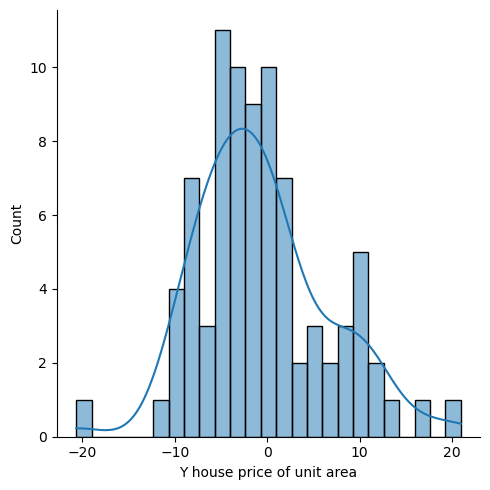

In [123]:
sns.displot(test_residual, bins = 25, kde = True)

### If the distribution of your residuals forms a nearly perfect normal (bell-shaped) curve, it suggests the following about your regression model:

* Good Fit: The residuals being normally distributed around zero is often a sign of a good model fit. This suggests that, on average, the model’s predictions are close to the actual values.

* No Systematic Bias: A normally distributed residual pattern indicates that there is likely no systematic bias in the model. In other words, the errors are random and not consistently overestimating or underestimating across different ranges of the target variable.

* Linearity Assumption Holds: For linear regression models, a normally distributed residual supports the assumption that the relationship between the features and the target variable is linear.

* Homoscedasticity (Constant Variance): Normality in residuals often indicates homoscedasticity, meaning the variance of the residuals is constant across different levels of the target variable. This is a desirable property in regression, as it implies stable error predictions across the dataset.

In summary, a normally distributed error in your residuals plot generally means your model is well-calibrated and performing as expected without evident bias or major unaddressed patterns in the data.

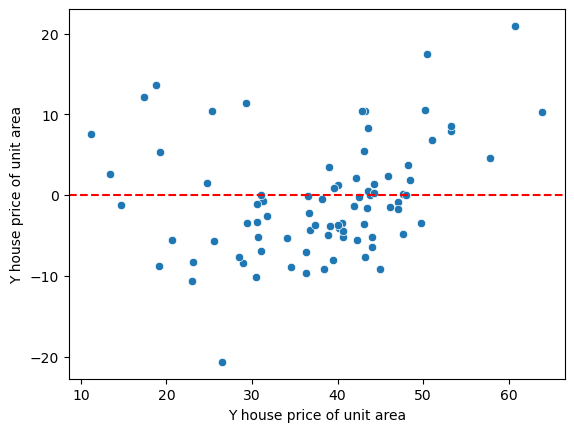

In [125]:
sns.scatterplot(x = y_test, y = test_residual)
plt.axhline(y = 0, color = 'r', ls = '--')

# Summary of the data

1. There are a total of 414 entries and 7 columns in the dataset.
2. Predicted column would be the House price column
3. There are no null values given in the dataset
4. The format of data in the transaction date column in not the standard one, hence needs to changed
5. Since, the date column year is proper but the value after the decimal point doesnt not make much sense, we remove the decimal point and make the column as year column
6. So, we have dataset from the years 2012 and 2013 with 126 values of 2012 and 288 of 2013
7. Seems like there are no outliers in the house age column
8. constructed a map to see the density of house in different areas
9. A new dataset is created which only contains the required columns to constryct the machine learning linear regression model.
10. number of convinience stores and distance to nearest MRT station columns have -0.61 correaltion and, both that columns have good correaltion with the house price columns, hence. we remove one and check while building the model
11. After buidlnming the model, we have predicted the y test
12. We have and MAE value of 5.500142360291331, MSE value of 49.89292343747077, RMSE value of 7.063492297544521, and the Rsqaured value of 0.5650296429041468.
13. We also made the residual plt which is a bell curved plot which means the model is a good fit.